Rainfall Prediction - Weather Forecasting
Problem Statement:

Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

Dataset Description:

Number of columns: 23

Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

Dataset available below

In [2]:
# 1. Import the libraries
# basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# statistical libraries
import phik
from scipy.stats import pearsonr
from scipy.stats import zscore

# feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, classification_report

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [368]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [369]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [370]:
df.isnull().sum()/len(df) * 100

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [371]:
# There are quite a few columns with missing values and hence we drop them
drop_col = []

for col in df.columns:
    if(df[col].isnull().sum()/len(df)*100 > 10):
        drop_col.append(col)

In [372]:
drop_col

['Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm']

In [373]:
# dropping the columns in drop_col
df.drop(columns = drop_col, inplace = True)

In [374]:
df.isnull().sum()/len(df)*100

Date            0.000000
Location        0.000000
MinTemp         0.890208
MaxTemp         0.712166
Rainfall        2.848665
WindDir9am      9.839763
WindDir3pm      3.655786
WindSpeed9am    0.902077
WindSpeed3pm    1.270030
Humidity9am     0.700297
Humidity3pm     1.210682
Temp9am         0.664688
Temp3pm         1.139466
RainToday       2.848665
RainTomorrow    2.836795
dtype: float64

In [375]:
# collecting all the numeric continuous data
from pandas.api.types import is_numeric_dtype

In [376]:
numeric_col = [col for col in df.columns if is_numeric_dtype(df[col])]

In [377]:
df[numeric_col]

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,20.0,24.0,71.0,22.0,16.9,21.8
1,7.4,25.1,0.0,4.0,22.0,44.0,25.0,17.2,24.3
2,12.9,25.7,0.0,19.0,26.0,38.0,30.0,21.0,23.2
3,9.2,28.0,0.0,11.0,9.0,45.0,16.0,18.1,26.5
4,17.5,32.3,1.0,7.0,20.0,82.0,33.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...
8420,2.8,23.4,0.0,13.0,11.0,51.0,24.0,10.1,22.4
8421,3.6,25.3,0.0,13.0,9.0,56.0,21.0,10.9,24.5
8422,5.4,26.9,0.0,9.0,9.0,53.0,24.0,12.5,26.1
8423,7.8,27.0,0.0,13.0,7.0,51.0,24.0,15.1,26.0


In [378]:
# We can use the statitical quantities to impute the missing values
from sklearn.impute import SimpleImputer

In [379]:
si = SimpleImputer( strategy = 'median')

In [380]:
for i in range(len(numeric_col)):
    df.loc[:,numeric_col[i]] = (si.fit_transform(df[numeric_col[i]].values.reshape(-1,1)))

In [381]:
df.isnull().sum()

Date              0
Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
WindDir9am      829
WindDir3pm      308
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Temp9am           0
Temp3pm           0
RainToday       240
RainTomorrow    239
dtype: int64

In [382]:
# The missing values in the numeric columns have been filled
# we check the distribution of the columns

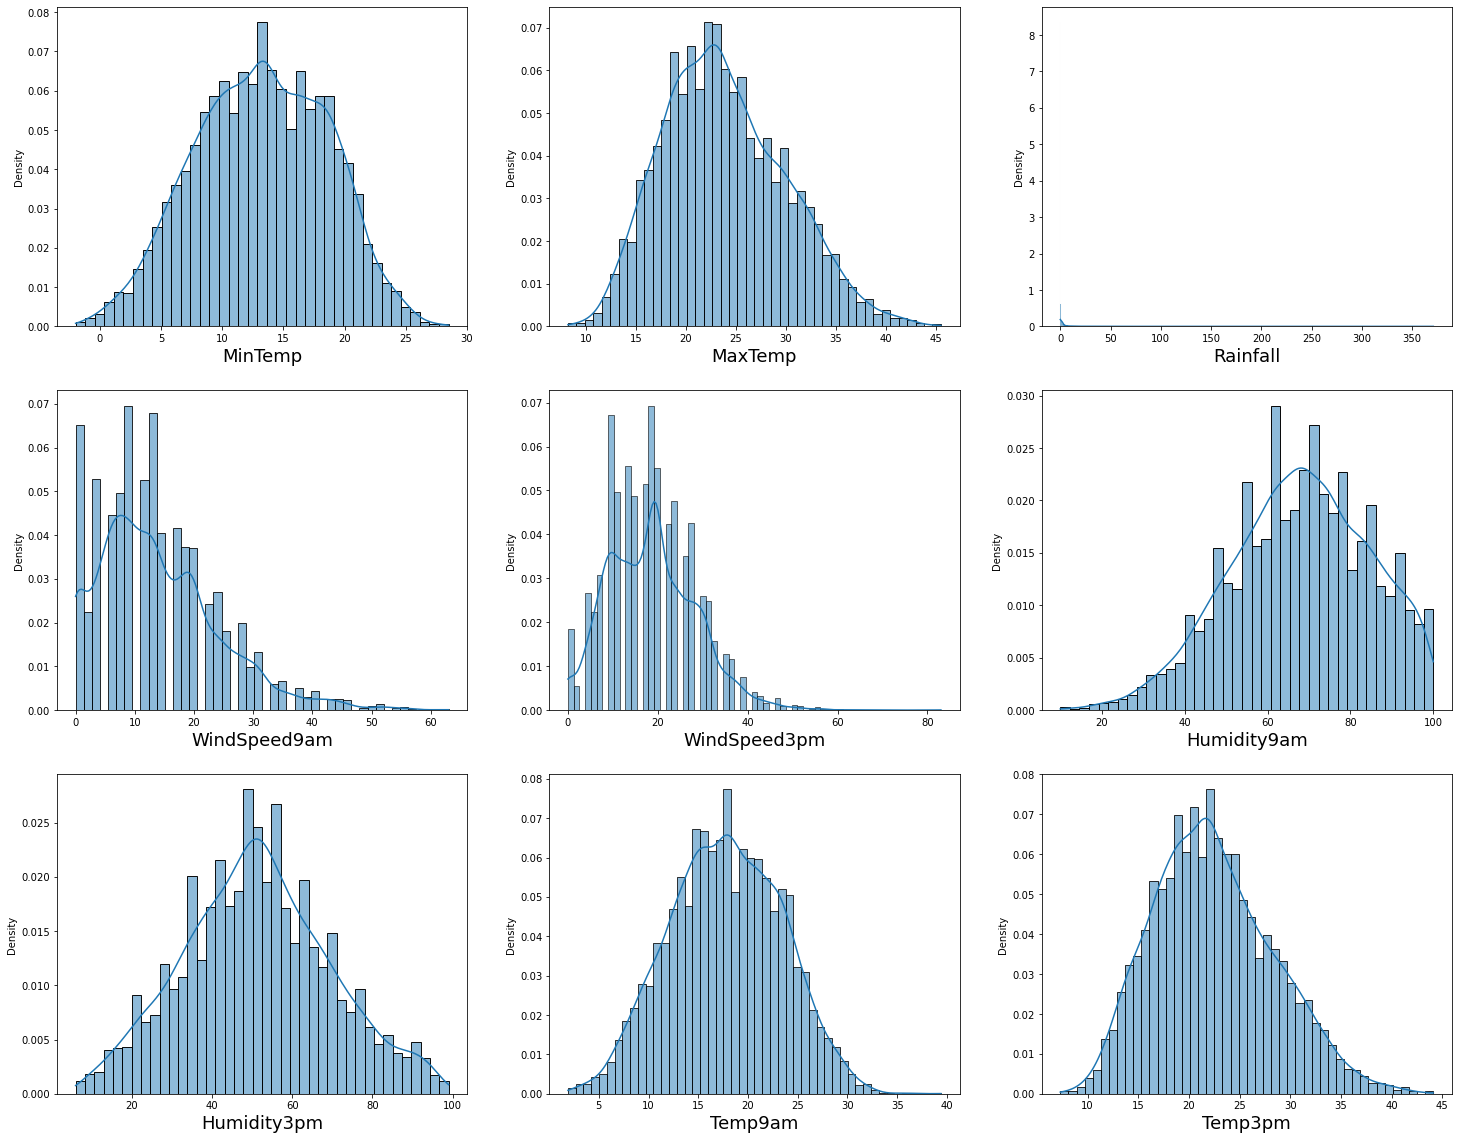

In [383]:
plt.figure(figsize = (25, 20))
plotnumber = 1
for col in numeric_col:
    if (plotnumber < 10):
        plt.subplot(3,3, plotnumber)
        sns.histplot(df[col], kde = True, stat = 'density')
        plt.xlabel(col, fontsize = 18)
    plotnumber += 1
plt.show()

In [384]:
# The distribution for all the numeric features is very well distributed, 
# however the feature 'Rainfall' seems to have an issue and hence we inspect 

In [385]:
# Checking for the variance in the numeric features
for col in numeric_col:
    print(f"{col:30s} :  {df[col].unique().shape[0]/len(df)*100:0.3f}%")

MinTemp                        :  3.383%
MaxTemp                        :  3.929%
Rainfall                       :  2.967%
WindSpeed9am                   :  0.404%
WindSpeed3pm                   :  0.415%
Humidity9am                    :  1.068%
Humidity3pm                    :  1.116%
Temp9am                        :  3.608%
Temp3pm                        :  3.893%


In [386]:
# Checking the statistics for the numerical features
df[numeric_col].describe().round()

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm
count,8425.0,8425.0,8425.0,8425.0,8425.0,8425.0,8425.0,8425.0,8425.0
mean,13.0,24.0,3.0,14.0,19.0,68.0,51.0,18.0,22.0
std,5.0,6.0,10.0,10.0,10.0,17.0,18.0,6.0,6.0
min,-2.0,8.0,0.0,0.0,0.0,10.0,6.0,2.0,7.0
25%,9.0,19.0,0.0,6.0,11.0,56.0,39.0,14.0,18.0
50%,13.0,23.0,0.0,13.0,19.0,68.0,51.0,18.0,22.0
75%,17.0,28.0,1.0,20.0,24.0,80.0,63.0,22.0,26.0
max,28.0,46.0,371.0,63.0,83.0,100.0,99.0,39.0,44.0


<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

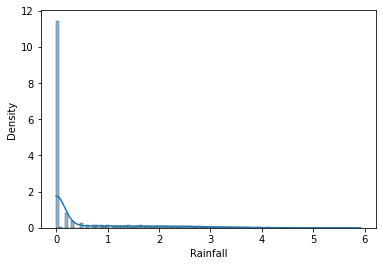

In [387]:
sns.histplot(np.log1p(df['Rainfall']), kde = True, stat = 'density')

<AxesSubplot:xlabel='Rainfall'>

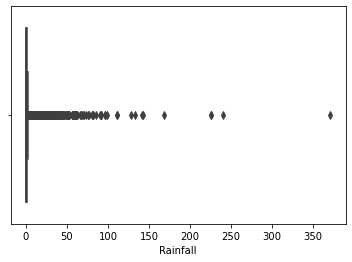

In [388]:
sns.boxplot(df['Rainfall'], orient = 'h')

In [389]:
# apparently there are quite a few outliers in the feature
# checking the number of outliers in the feature

q1 = df['Rainfall'].quantile(0.25)
q3 = df['Rainfall'].quantile(0.75)
iqr = q3 - q1
hi = q3 + 1.5 * iqr

print(f"%age of outlier data : {np.where(df['Rainfall'] > hi)[0].shape[0]/len(df)*100:0.3f}%")

%age of outlier data : 19.407%


In [390]:
print(f"{np.where(df['Rainfall'].values == 0)[0].shape[0]/len(df)*100:0.3f}")

65.745


In [391]:
# 65% of the feature Rainfall reports no rain. This feature would make more sense to be used
# as a binary categorical feature

In [392]:
indices = np.where(df['Rainfall'].values == 0)[0]

In [393]:
df.loc[~df.index.isin(indices), 'Rainfall'] = 1

In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          8425 non-null   object 
 1   Location      8425 non-null   object 
 2   MinTemp       8425 non-null   float64
 3   MaxTemp       8425 non-null   float64
 4   Rainfall      8425 non-null   float64
 5   WindDir9am    7596 non-null   object 
 6   WindDir3pm    8117 non-null   object 
 7   WindSpeed9am  8425 non-null   float64
 8   WindSpeed3pm  8425 non-null   float64
 9   Humidity9am   8425 non-null   float64
 10  Humidity3pm   8425 non-null   float64
 11  Temp9am       8425 non-null   float64
 12  Temp3pm       8425 non-null   float64
 13  RainToday     8185 non-null   object 
 14  RainTomorrow  8186 non-null   object 
dtypes: float64(9), object(6)
memory usage: 987.4+ KB


In [395]:
# now we use the KNNImputer to remove the outliers in the categorical features
categorical_col = []
for col in df.columns:
    if not is_numeric_dtype(df[col]):
        categorical_col.append(col)

In [396]:
from feature_engine.imputation import CategoricalImputer

In [397]:
categorical_col = categorical_col[2:]

In [398]:
df[categorical_col].isnull().sum()

WindDir9am      829
WindDir3pm      308
RainToday       240
RainTomorrow    239
dtype: int64

In [399]:
df[categorical_col] = CategoricalImputer(imputation_method = 'frequent').fit_transform(df[categorical_col])

In [400]:
df.isnull().sum()

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
WindDir9am      0
WindDir3pm      0
WindSpeed9am    0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [358]:
# all missing values have been removed

In [402]:
# Checking to the see the correlation of the features with the target variable
from pandas.api.types import is_numeric_dtype


In [403]:
# Encoding the categorical columns
df['Date'] = pd.to_datetime(df['Date']).dt.year
df['Date'] = df['Date'] - df['Date'].min()

In [404]:
x = df.drop(columns = df.columns[-1])
y = df[df.columns[-1]]

In [405]:
temp = pd.DataFrame()
pvalue = []
score = []
feature = []

for col in x.columns:
    if is_numeric_dtype(x[col]):
        feature.append(col)
        score.append(phik.phik_from_array(x[col], y, [col]))
        pvalue.append(phik.significance.significance_from_array(x[col], y, [col])[0])
    else:
        feature.append(col)
        score.append(phik.phik_from_array(x[col], y))
        pvalue.append(phik.significance.significance_from_array(x[col], y)[0])

In [406]:
temp['feature'] = feature
temp['score'] = score
temp['pvalue'] = pvalue

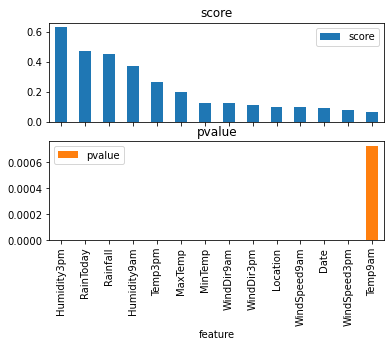

In [409]:
temp.set_index('feature', inplace = True)
temp.sort_values('score', ascending = False).plot.bar(subplots = True)
plt.show()

In [411]:
temp.sort_values('score',ascending = False)

,score,pvalue
feature,,
Humidity3pm,0.628368,0.000000e+00
RainToday,0.471299,5.655853e-165
Rainfall,0.447896,3.332137e-156
Humidity9am,0.371727,1.528872e-141
Temp3pm,0.263502,3.517024e-68
MaxTemp,0.200283,1.948716e-39
MinTemp,0.126218,9.104900e-16
WindDir9am,0.122983,2.388734e-14
WindDir3pm,0.110835,6.107992e-10


In [412]:
# All the features show a good correlation with the target variable and hence they can be kept

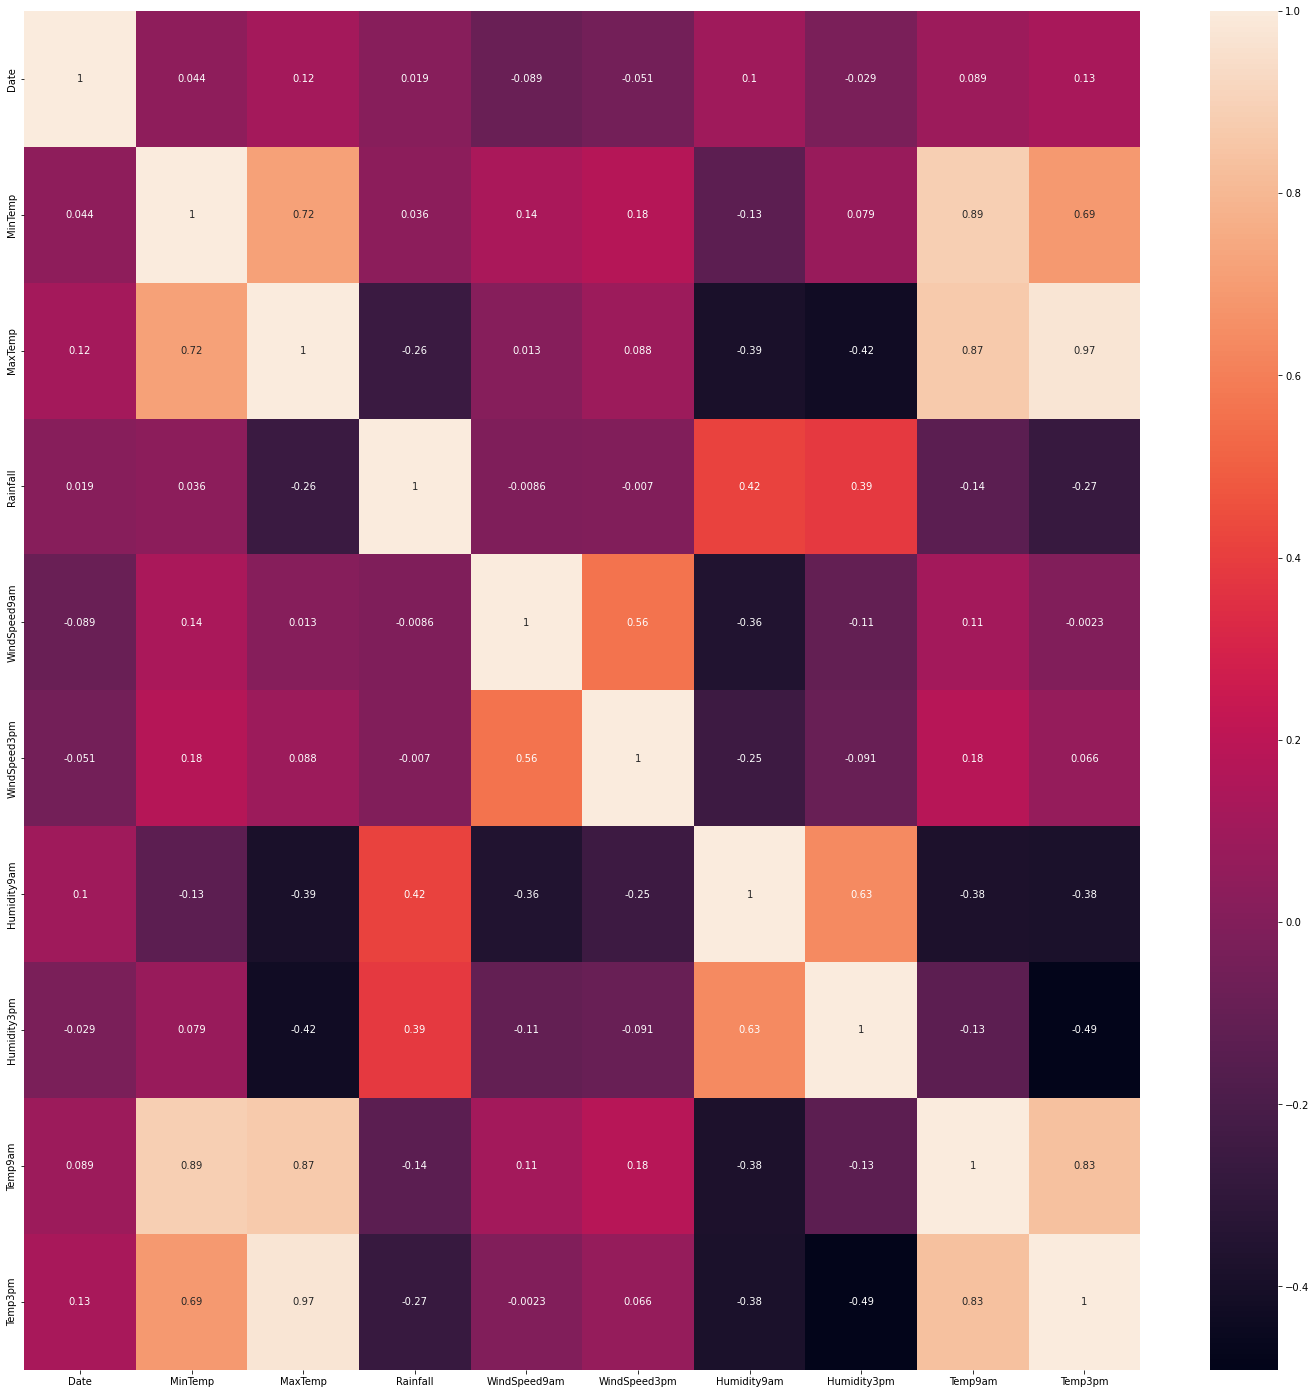

In [417]:
# we check to see for any correlation within the numerical features itself
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [428]:
# apparently there appears to be some correlation within some features and we investigate them with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [447]:
temp = pd.DataFrame()
df_num = df[numeric_col]
temp['feature'] = numeric_col
temp['Score'] = [vif(df_num , i) for i in range(len(df_num.columns))]
temp.sort_values('Score', ascending = False)

,feature,Score
8,Temp3pm,446.458331
1,MaxTemp,407.636562
7,Temp9am,176.552127
5,Humidity9am,56.944118
6,Humidity3pm,39.984346
0,MinTemp,37.589456
4,WindSpeed3pm,6.939518
3,WindSpeed9am,4.335112
2,Rainfall,2.046018


In [448]:
# Now we check for which features show a high correlation and remove the ones that do

Now the feature Temp3pm shares a strong correlation with the Temp9am and the MaxTemp both of which have a lower correlation with the target variable. Hence we drop the latter two features

In [451]:
df.drop(columns = ['Temp9am', 'MaxTemp'], inplace = True)

In [453]:
from sklearn.preprocessing import LabelEncoder
df['Location'] = LabelEncoder().fit_transform(df['Location'])

In [454]:
df['RainToday'] = pd.get_dummies(df['RainToday'], drop_first=  True)
df['RainTomorrow'] = pd.get_dummies(df['RainTomorrow'], drop_first = True)

In [455]:
df['WindDir9am'] = LabelEncoder().fit_transform(df['WindDir9am'])
df['WindDir3pm'] = LabelEncoder().fit_transform(df['WindDir3pm'])

In [456]:
df

,Date,Location,MinTemp,Rainfall,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,1.0,13,14,20.0,24.0,71.0,22.0,21.8,0,0
1,0,1,7.4,0.0,6,15,4.0,22.0,44.0,25.0,24.3,0,0
2,0,1,12.9,0.0,13,15,19.0,26.0,38.0,30.0,23.2,0,0
3,0,1,9.2,0.0,9,0,11.0,9.0,45.0,16.0,26.5,0,0
4,0,1,17.5,1.0,1,7,7.0,20.0,82.0,33.0,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,9,2.8,0.0,9,1,13.0,11.0,51.0,24.0,22.4,0,0
8421,9,9,3.6,0.0,9,3,13.0,9.0,56.0,21.0,24.5,0,0
8422,9,9,5.4,0.0,9,14,9.0,9.0,53.0,24.0,26.1,0,0
8423,9,9,7.8,0.0,10,3,13.0,7.0,51.0,24.0,26.0,0,0


In [474]:
# Checking for class imbalance
df['RainTomorrow'].value_counts()

0    6434
1    1991
Name: RainTomorrow, dtype: int64

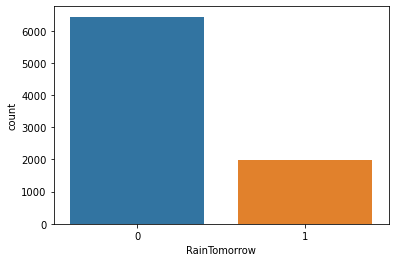

In [475]:
sns.countplot(df['RainTomorrow'])
plt.show()

In [476]:
# The class is severely imbalanced and hence we upsample the data

from imblearn.over_sampling import RandomOverSampler

In [478]:
x = df.drop('RainTomorrow', axis = 1)
y = df['RainTomorrow'].copy()

In [479]:
x_resampled, y_resampled = RandomOverSampler().fit_resample(x,y)

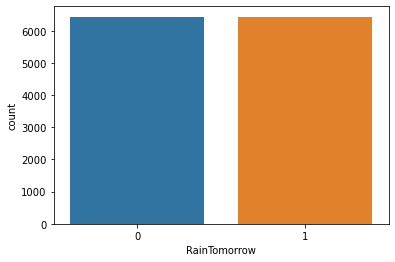

In [481]:
# Checking for resampled data
sns.countplot(y_resampled)
plt.show()

In [486]:
# Splitting the data into a training and test data set
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.25, random_state = 42)

In [487]:
# Building our Logistic regressor models
dt = DecisionTreeClassifier()
lr = LogisticRegression()
kn = KNeighborsClassifier()
rf = RandomForestClassifier()

In [488]:
estimators = []
estimators.append((dt, 'DecisionTreeClassifier'))
estimators.append((lr, 'LogisticRegression'))
estimators.append((kn, 'KNeighborsClassifier'))
estimators.append((rf, 'RandomForestClassifier'))

In [490]:
from sklearn.metrics import accuracy_score, plot_roc_curve

for estimator in estimators:
    estimator[0].fit(xtrain, ytrain)
    ypred = estimator[0].predict(xtest)
    print()
    print(f"{estimator[1]} : {accuracy_score(ytest, ypred)*100:0.3f}%")


DecisionTreeClassifier : 84.623%

LogisticRegression : 82.677%

KNeighborsClassifier : 82.534%

RandomForestClassifier : 89.511%


The DecisionTreeClassifier and the RandomForestClassifier show the best accuracy however we check the ROC curves to best estimate their predictions

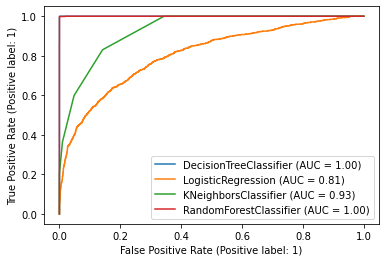

In [491]:
axis = plot_roc_curve(dt, xtrain, ytrain)
for estimator in estimators[1:]:
    plot_roc_curve(estimator[0], xtrain, ytrain, ax = axis.ax_)

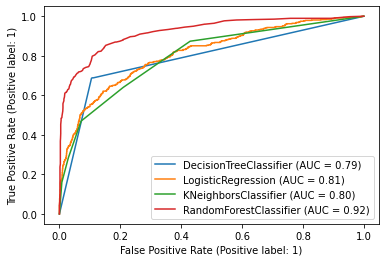

In [492]:
axis = plot_roc_curve(dt, xtest, ytest)
for estimator in estimators[1:]:
    plot_roc_curve(estimator[0], xtest, ytest, ax = axis.ax_)

The RandomForestClassifier gives the best performance compared 

In [494]:
param_grid = {'n_estimators':[100, 150, 200, 300],
              'criterion' :['gini','entropy'],
              'max_depth' :[2, 3, 4, 5, 6, 7],
              'min_samples_split': [2, 4, 5, 6, 8]}

gs1 = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, n_jobs = -1)
gs1.fit(xtrain, ytrain)
rf_best_est = gs1.best_estimator_

In [495]:
rf_best_est.fit(xtrain, ytrain)
ytest = rf_best_est.predict(xtest)
print(f"{accuracy_score(ytest, ypred)*100:0.3f}%")

92.311%


<font color = red>
Apparently the best paramters tend to give the same Accuracy score
</font>

<font color = blue>Hence we stick with the original RandomForestClassifier and save it</font>

In [498]:
import joblib
joblib.dump(rf, 'Rainfall_prediction.pkl')

['Rainfall_prediction.pkl']